In [14]:
from os import listdir
from os.path import isfile, join
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def cal_f1_score(path_pre, eps = 0.0001):

    ref_path = path_pre + '/reference/'
    reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
    dec_path = path_pre + '/decoded/'
    decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

    reference_files.sort()
    decoded_files.sort()

    num_file = len(reference_files)
    precisions = np.zeros(num_file)
    recalls = np.zeros(num_file)

    tokenizer = TweetTokenizer()
    for i in range(num_file):
    #     if reference_files[i][:6] ==  decoded_files[i][:6]:
    #         print reference_files[i], decoded_files[i]
        f_ref = open(ref_path + reference_files[i], 'r').read()
        f_ref_token = set(tokenizer.tokenize(f_ref))
    #     print(reference_files[i] ,f_red.read())
        f_decode = open( dec_path + decoded_files[i], 'r').read()
        f_decode_token = set(tokenizer.tokenize(f_decode))
        precisions[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
        recalls[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
        
    pre = np.mean(precisions)
    rec = np.mean(recalls)
    f1 = 2.0 / (1.0/pre + 1.0/rec)
    print('total ', i, ' number of samples')
    return [pre, rec, f1 ]
#         print reference_files[i]
#         print "ref:", f_ref
#         print decoded_files[i]
#         print "decode:", f_decode
#     print( decoded_files[i] , f_decode.read())
# f = open('example.txt', 'r')


In [10]:
# pretrained model
path_pre = './log/pretrained_model/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410'

cal_f1_score(path_pre) # return: precision, recall, f1

('total ', 4458, ' number of samples')


[0.14248918894115392, 0.38500032992872757, 0.20799800864727042]

In [11]:
# our training
path_pre = './log/reddit_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-39995_cov_init_cov_init'

cal_f1_score(path_pre)

('total ', 4458, ' number of samples')


[0.22693112952839692, 0.280542278653292, 0.2509048756007665]

In [12]:
# lead-3 baseline
path_pre = '../AskReddit_baseline_summarization'

cal_f1_score(path_pre)

('total ', 446413, ' number of samples')


[0.13421487565445456, 0.34257666185145413, 0.1928678697320262]

In [34]:
np.max(recalls)

1.0

In [35]:
np.mean(recalls)

0.38630394815427593

In [36]:
np.mean(precisions)

0.13801663019276983

In [7]:
i

517

In [28]:
i = 735
f_ref = open(ref_path + reference_files[i], 'r').read()
f_ref_token = set(tokenizer.tokenize(f_ref))
#     print(reference_files[i] ,f_red.read())
f_decode = open( dec_path + decoded_files[i], 'r').read()
f_decode_token = set(tokenizer.tokenize(f_decode))
# precisions[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_decode_token)
# recalls[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_ref_token)
print reference_files[i]
print "ref:", f_ref
print decoded_files[i]
print "decode:", f_decode

000735_reference.txt
ref: nothing .
000735_decoded.txt
decode: something ? seriously , i am now currently doing nothing it is because more then .
am not on the internet but in the end it would be more effort for the same result .
if i am said person asking said question in which whatever i was doing something that does not matter to you so by default in too becomes nothing .


In [31]:
f_decode_token.intersection(f_ref_token)

{u'.', u'nothing'}

## relationships small dataset

In [26]:
def add_example(eg_list, f_content, f_ref, f_decode, precision, recall):
    return eg_list + [{'content':f_content, 'reference': f_ref, 'decode': f_decode, 
                      'precision': precision, 'recall': recall}]

In [36]:
path_pre = './log/test_exp/decode_train_400maxenc_4beam_35mindec_120maxdec_ckpt-2315_cov_init'

ref_path = path_pre + '/reference/'
reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
dec_path = path_pre + '/decoded/'
decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

reference_files.sort()
decoded_files.sort()

eps = 0.0001

num_file = len(decoded_files)
precisions = np.zeros(num_file)
recalls = np.zeros(num_file)

low_prec_low_recall = []
low_prec_high_recall = []
high_prec_low_recall = []
high_prec_high_recall = []

low_shreshold = 0.2
high_shreshold = 0.5

tokenizer = TweetTokenizer()
for i in range(num_file):
#     if reference_files[i][:6] ==  decoded_files[i][:6]:
#         print reference_files[i], decoded_files[i]
    f_ref = open(ref_path + reference_files[2 * i + 1], 'r').read()
    f_ref_token = set(tokenizer.tokenize(f_ref))
    f_content = open(ref_path + reference_files[2 * i], 'r').read()
    f_content_token = set(tokenizer.tokenize(f_ref))
#     print(reference_files[i] ,f_red.read())
    f_decode = open( dec_path + decoded_files[i], 'r').read()
    f_decode_token = set(tokenizer.tokenize(f_decode))
    precision = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
    precisions[i] = precision
    recall = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
    recalls[i] = recall
    if precision <= low_shreshold and recall <= low_shreshold:
        low_prec_low_recall = add_example(low_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
    elif  precision <= low_shreshold and recall > high_shreshold:
        low_prec_high_recall = add_example(low_prec_high_recall, f_content, f_ref, f_decode, precision, recall)
    elif precision > high_shreshold and recall <= low_shreshold:
        high_prec_low_recall = add_example(high_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
    elif precision > high_shreshold and recall > high_shreshold:
        high_prec_high_recall = add_example(high_prec_high_recall, f_content, f_ref, f_decode, precision, recall)
        
    print('content: ', f_content)
    print('reference: ', f_ref)
    print('decoded:', f_decode)

pre = np.mean(precisions)
rec = np.mean(recalls)
f1 = 2.0 / (1.0/pre + 1.0/rec)
print('total ', i, ' number of samples')
examples = {'low_prec_low_recall': low_prec_low_recall,
           'low_prec_high_recall': low_prec_high_recall,
           'high_prec_low_recall': high_prec_low_recall,
           'high_prec_high_recall': high_prec_high_recall}
# return [pre, rec, f1 ]

('content: ', "i am a 57-year old , happily married man , living near a major northeast city . my wife and i want different things sexually , and while we usually have a great time in bed , it 's usually her doing things for me , and me doing different things for her . it 's been frustrating at times , so last year we started swinging . and it 's been amazing for both of us . we met another couple that has a similar incompatibility , but with the genders reversed . so the four of us have the most amazing sex , either in a group , or pairing off . for various reasons , this relationship with the other couple is cooling off , and possibly ending . my wife had her adventure and is done . i 'm not done , and my wife is fine with that . she is actively encouraging me to find new partners . so here 's my problem : how do i find sexual partners , at my age , and in my situation -- an open marriage ? as a single guy on the swingers ' website , where we met the other couple , i have had zero lu

In [37]:
for key, value in examples.items():
    print(key, len(value))
examples

('low_prec_high_recall', 3)
('low_prec_low_recall', 8)
('high_prec_high_recall', 10)
('high_prec_low_recall', 0)


{'high_prec_high_recall': [{'content': "so i thought i 'd update you on this . this might be long after i messaged rosie i blocked her because anxiety took over and i was afraid she would be really mad . fast forward a few days i get a message from a friend who also knows rosie who says hey op i saw rosie and she said that she 'd been having issues getting online but she got some messages from you with screenshots and she ca n't seem to reply but she 's really grateful you sent them because it put a lot of things into perspective for her . so i unblocked her and explained that i was worried she 'd be mad and that i hope she 's okay etc. . she has n't replied . but i feel at peace about the situation i 'm really glad i told her and i hope that i 've made a positive difference to her life . on to greg greg decided to make a fake profile and add me as a friend not long after i 'd blocked him and cut contact . i refused the request but received a message from him saying about how i 'd ruin

In [38]:
[pre, rec, f1 ]

[0.31974029778215757, 0.40476269263471176, 0.35726269066098604]

(array([ 3., 15., 15., 18., 10.,  4.,  2.,  2.,  4.,  6.]),
 array([0.        , 0.0806449 , 0.1612898 , 0.2419347 , 0.3225796 ,
        0.40322451, 0.48386941, 0.56451431, 0.64515921, 0.72580411,
        0.80644901]),
 <a list of 10 Patch objects>)

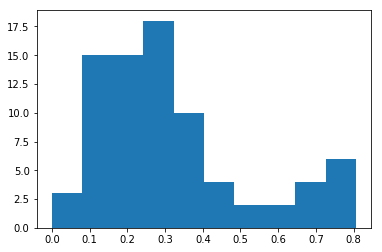

In [15]:
plt.hist(precisions)

(array([ 1.,  6., 25., 19.,  8.,  5.,  5.,  1.,  3.,  6.]),
 array([0.        , 0.09999923, 0.19999846, 0.29999769, 0.39999692,
        0.49999615, 0.59999538, 0.69999462, 0.79999385, 0.89999308,
        0.99999231]),
 <a list of 10 Patch objects>)

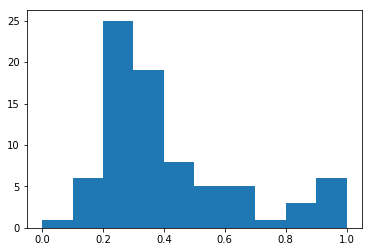

In [16]:
plt.hist(recalls)